In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data= pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Binary Classification

<AxesSubplot:xlabel='radius_mean', ylabel='texture_mean'>

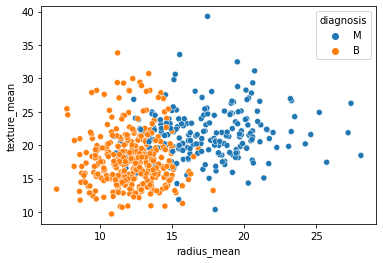

In [23]:
sns.scatterplot(x="radius_mean",y="texture_mean",hue="diagnosis",data=data)

# MultiClass Classification

In [24]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<AxesSubplot:xlabel='bill_length_mm', ylabel='flipper_length_mm'>

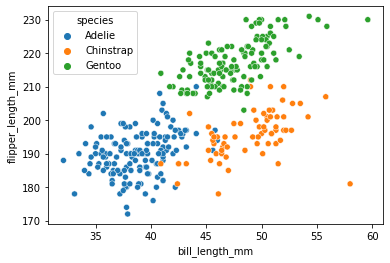

In [25]:
sns.scatterplot(x="bill_length_mm",y="flipper_length_mm",hue="species",data=penguins)

In [1]:
#Preparing Data for training algorithm

In [26]:
d = {'Adelie':1, 'Chinstrap':2, 'Gentoo':3}
penguins["species"] = penguins["species"].map(d, na_action='ignore')
penguins = penguins.dropna(axis=0)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,1,Torgersen,40.3,18.0,195.0,3250.0,Female
4,1,Torgersen,36.7,19.3,193.0,3450.0,Female
5,1,Torgersen,39.3,20.6,190.0,3650.0,Male


In [27]:
y = penguins[["species"]]
X = penguins[["bill_length_mm", "flipper_length_mm"]]

In [28]:
#Splitting the data into training and test datasets

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# K - nearest neighbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=1,weights='uniform',metric='euclidean')
knn.fit(X_train, y_train)

/home/knoldus/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [32]:
knn.score(X_test, y_test)


0.9761904761904762

# SVC

In [33]:
cancer_data=pd.read_csv("data.csv")
d={"M":1,"B":2}
cancer_data['diagnosis']=cancer_data.diagnosis.map(d)

# Separate the feature and label variables
Xc=cancer_data[["radius_mean",'texture_mean']]
yc=cancer_data[['diagnosis']]
Xc_train,Xc_test,yc_train,yc_test=train_test_split(Xc,yc,random_state=0)

# Import the SVM library and fit the model
from sklearn.svm import SVC

lsvm=SVC(C=1,kernel='linear')
lsvm.fit(Xc_train,yc_train)

/home/knoldus/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=1, kernel='linear')

In [69]:
ksvm = SVC(C=0.0005, kernel='rbf', gamma=0.01)
ksvm.fit(Xc_train, yc_train)

/home/knoldus/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=0.0005, gamma=0.01)

In [70]:
ksvm.score(Xc_test, yc_test)

0.6293706293706294

# Decision Tree

0.9404761904761905

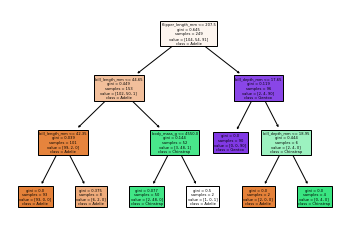

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Consider all the features for classification
y=penguins[["species"]]
X=penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# max_depth parameter determines the maximum number of levels in the decision tree
dclf = DecisionTreeClassifier(max_depth=3, random_state=0)
dclf.fit(X_train, y_train)

# Plot the decision tree using the plot tree function
f_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
c_names=['Adelie','Chinstrap','Gentoo']
 
plot_tree(dclf, feature_names=f_names, class_names=c_names, filled=True)

# Score
dclf.score(X_test, y_test)

# Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=5, max_depth=3, random_state=0)

rfclf.fit(X_train,y_train)
rfclf.score(X_test,y_test)

<ipython-input-37-02cd5084e2d1>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfclf.fit(X_train,y_train)


0.9523809523809523

In [38]:
for name, score in zip(X_train.columns, rfclf.feature_importances_):
    print(name, score)

bill_length_mm 0.5186342825858854
bill_depth_mm 0.3420978480595717
flipper_length_mm 0.032320642858410395
body_mass_g 0.10694722649613257


In [39]:
#We can improve the accuracy of these trees by Boosting them. We use  Gradient Boosting to do.

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gbclf = GradientBoostingClassifier(max_depth=3, n_estimators=10)
gbclf.fit(X_train, y_train)
gbclf.score(X_test, y_test)

/home/knoldus/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9761904761904762

# Hyperparameter Tuning

In [41]:
#Cross validation

In [42]:
#improving on the kernelized SVM model
from sklearn.model_selection import cross_val_score
cross_val_score(ksvm, Xc_train, yc_train, cv=5)

/home/knoldus/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/knoldus/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/knoldus/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/knoldus/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

array([0.93023256, 0.89411765, 0.87058824, 0.89411765, 0.91764706])

In [43]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators' : [10,15,20], 'max_depth' : [3,5,8]}
rfclf = RandomForestClassifier()
grid = GridSearchCV(rfclf, param_grid=params)
grid.fit(X_train, y_train)

/home/knoldus/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/knoldus/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/knoldus/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/knoldus/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataCon

/home/knoldus/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/knoldus/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/knoldus/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/knoldus/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataCon

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 8], 'n_estimators': [10, 15, 20]})

In [44]:
#Finding out parameters that give us the best score
grid.best_params_

{'max_depth': 5, 'n_estimators': 20}

In [45]:
#Finding best score
grid.best_score_

0.9800000000000001

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(gbclf, Xc_train, yc_train, cv=5)
confusion_matrix(yc_train, y_train_pred)

/home/knoldus/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/knoldus/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/knoldus/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/knoldus/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

array([[119,  40],
       [ 15, 252]])

In [47]:
from sklearn.metrics import precision_score, recall_score
print("Precision: ", precision_score(yc_train, y_train_pred))
print("Recall: ", recall_score(yc_train, y_train_pred))

Precision:  0.8880597014925373
Recall:  0.7484276729559748


In [48]:
from sklearn.metrics import f1_score
f1_score(yc_train, y_train_pred)

0.8122866894197952

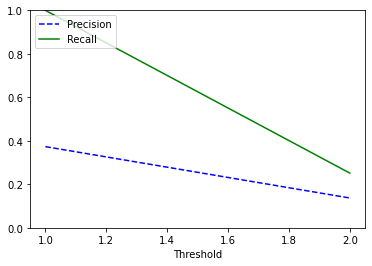

In [51]:
#Plotting precion vs recall to get the best combination of highest threshold 
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(yc_train, y_train_pred, pos_label=1)

plt.plot(threshold, precision[:-1], "b--", label="Precision")
plt.plot(threshold, recall[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.show()

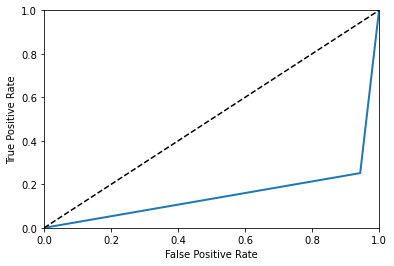

In [52]:
import sklearn.metrics as metrics

# Calculating the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(yc_train, y_train_pred, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [53]:
from sklearn.metrics import roc_auc_score
roc_auc_score(yc_train, y_train_pred)

0.846123948837538